# **Supermart Grocery Sales- Retail Analytics**

## **Import Libraries**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
 



## **Load the Dataset**

In [52]:
data = pd.read_csv("D:/unified mentor projects/Supermart Grocery Sales – Retail Analytics/Supermart Grocery Sales  Retail Analytics Dataset.csv")

In [53]:
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


## **Data Preprocessing**

### Check for Missing Values and Handle Them

In [54]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
None


In [55]:
print(data.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [56]:
data.dropna(inplace=True)

In [57]:
data.drop_duplicates(inplace=True)

### Convert Date Columns to DateTime Format


In [58]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed', errors='coerce')
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Then extract the month name
data['Month'] = data['Order Date'].dt.strftime('%B')  # e.g., 'January'


In [59]:
# Check how many dates couldn't be parsed
print(data['Order Date'].isna().sum())


0


In [60]:
print(data[data['Order Date'].isna()])


Empty DataFrame
Columns: [Order ID, Customer Name, Category, Sub Category, City, Order Date, Region, Sales, Discount, Profit, State, Month]
Index: []


In [61]:
 # Extract day, month, and year from 'Order Date'
 data['Order Day'] = data['Order Date'].dt.day
 data['Order Month'] = data['Order Date'].dt.month
 data['Order Year'] = data['Order Date'].dt.year

### Label Encoding for Categorical Variables

In [62]:
# Initialize the label encoder
le = LabelEncoder()

In [63]:
# Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Month'] = le.fit_transform(data['Month'])

In [64]:
# Display the first few rows after encoding
print(data.head())


  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Month  Order Day  Order Month  Order Year  
0   1254      0.12  401.28      0      9          8           11        2017  
1    749      0.18  149.80      0      9          8           11        2017  
2   2360      0.21  165.20      0      6         12            6        2017  
3    896      0.25   89.60      0     10         11           10        2016  
4   2355      0.26  918.45      0     10         11           10        2016  


## **Exploratory Data Analysis (EDA)**

### Distribution of Sales by Category

C:\Users\PRATIK\AppData\Local\Temp\ipykernel_4764\771904437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


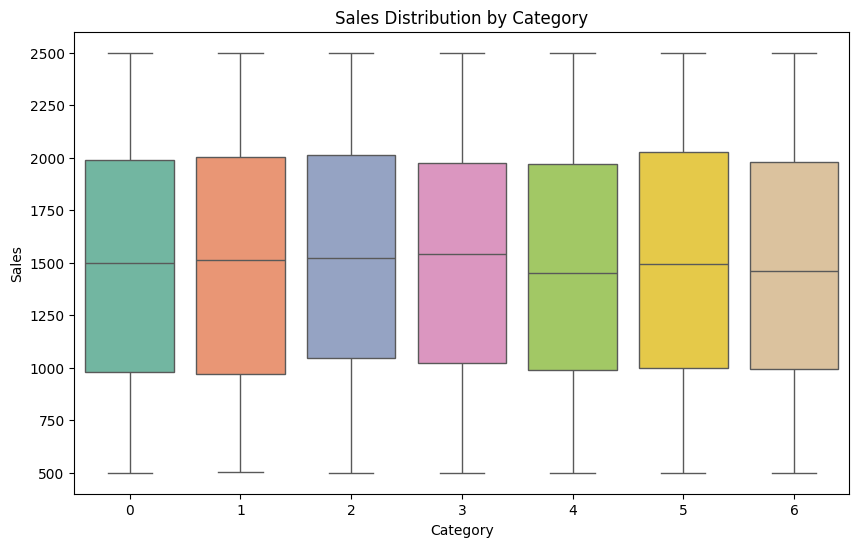

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

### Sales Trends Over Time

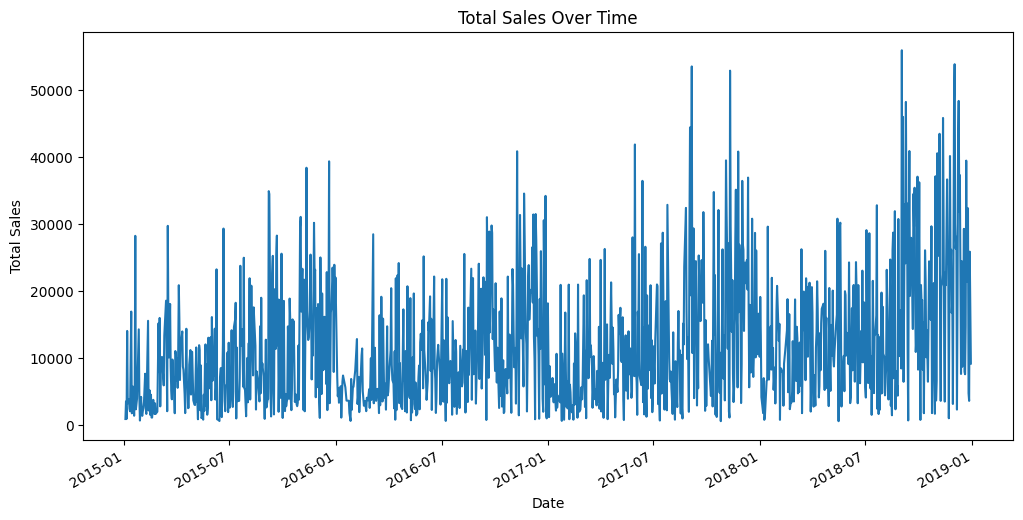

In [66]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

### Correlation Heatmap

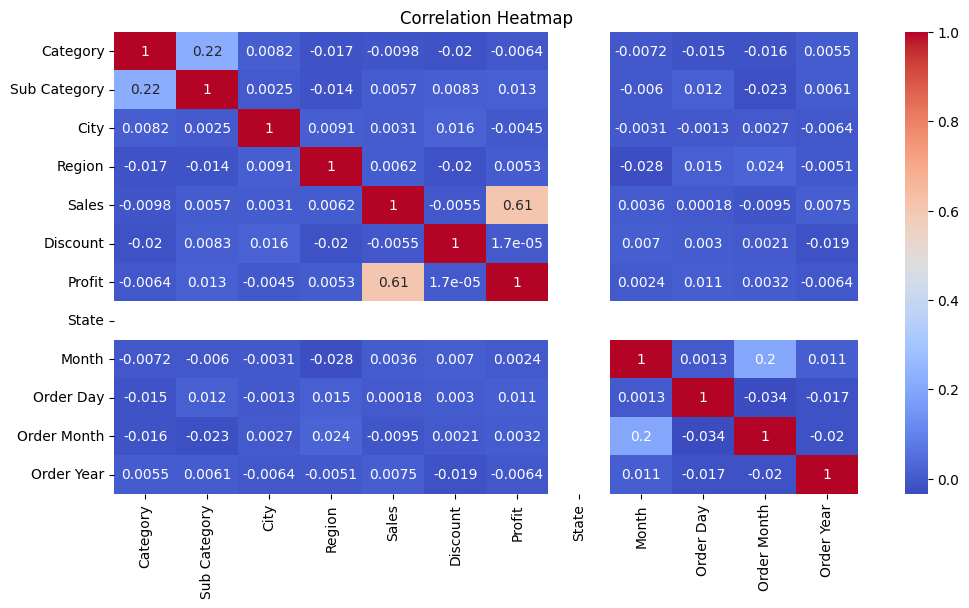

In [68]:
plt.figure(figsize=(12, 6))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## **Feature Selection and Model Building**

In [76]:
# Select features and target variable
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', 'Month'])
target = data['Sales']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## **Train a Linear Regression Model**

In [77]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

## **Evaluate the Model**

In [78]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212954.08313440107
R-squared: 0.3543257711757313


## **Visualize the Results**

### Actual vs Predicted Sales

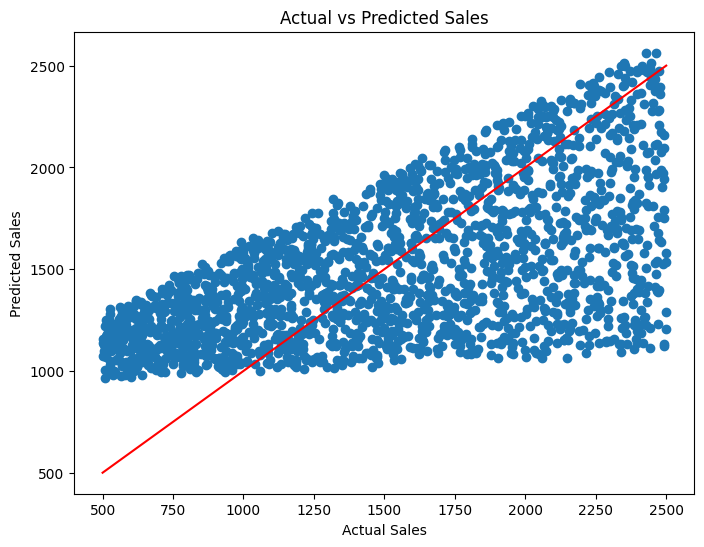

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()